In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def myround(x, base=5):
    return base * round(x/base)

In [122]:
sims_folder = "../data/sims"
results = pd.read_csv(f"{sims_folder}/sim1/results.csv", delimiter=";", index_col=0)
inputs = pd.read_csv(f"{sims_folder}/sim1/input_data.csv", delimiter=",", index_col=0)
results2 = pd.read_csv(f"{sims_folder}/sim2/results.csv", delimiter=";", index_col=0)
inputs2 = pd.read_csv(f"{sims_folder}/sim2/input_data.csv", delimiter=",", index_col=0)
results3 = pd.read_csv(f"{sims_folder}/sim3/results.csv", delimiter=";", index_col=0)
inputs3 = pd.read_csv(f"{sims_folder}/sim3/input_data.csv", delimiter=",", index_col=0)

In [123]:
inputs

,prodPV,prodHydro,prodSolTh,consChal,consECS,consFroid,consElec
heure,,,,,,,
1,0.0,61.62076,0.0,38.4300,0.000000,-0.0,27.334889
2,0.0,61.62076,0.0,42.7095,0.000000,-0.0,27.334889
3,0.0,61.62076,0.0,46.4985,0.000000,-0.0,27.334889
4,0.0,61.62076,0.0,50.4360,0.000000,-0.0,27.334889
5,0.0,61.62076,0.0,54.3780,0.000000,-0.0,27.334889
...,...,...,...,...,...,...,...
8756,0.0,62.90708,0.0,63.8190,151.309829,-0.0,228.003160
8757,0.0,62.90708,0.0,65.3580,44.223141,-0.0,49.777231
8758,0.0,62.90708,0.0,65.9160,38.695249,-0.0,51.463118


In [124]:
results

,Bilan [kWh],Stockage eau [kWh],Température du stock [°C],COP chauffage,COP ECS,ECS Gachée [kWh],Stock batterie [kWh],Stockage hydrogene [kWh],consElecPac,pertes_horaires
Heure,,,,,,,,,,
1.0,0.0,304121.633862,63.990064,28.595833,28.548555,0.0,250.000000,12007.702882,2.190529,15.930000
2.0,0.0,304057.061250,63.979449,28.548555,28.498224,0.0,250.000000,12015.368942,2.343956,15.927069
3.0,0.0,303988.839754,63.968236,28.498224,28.445242,0.0,250.000000,12023.002125,2.480942,15.923938
4.0,0.0,303916.826995,63.956398,28.445242,28.389529,0.0,250.000000,12030.601005,2.623870,15.920629
5.0,0.0,303841.019608,63.943938,28.389529,28.331115,0.0,250.000000,12038.165354,2.767751,15.917138
...,...,...,...,...,...,...,...,...,...,...
8756.0,0.0,309825.588822,64.927653,34.082442,33.987310,0.0,0.000000,17134.077352,7.043136,16.214935
8757.0,0.0,309695.491134,64.906268,33.825561,33.730261,0.0,8.246464,17134.077352,3.967111,16.203657
8758.0,0.0,309570.238180,64.885679,33.683552,33.588484,0.0,15.093950,17134.077352,3.835644,16.197349


250

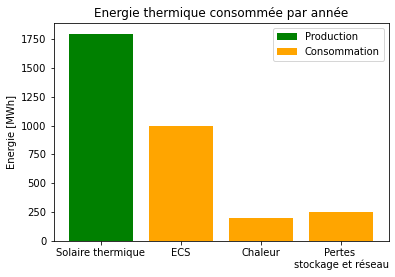

In [125]:
arrondi = 50
chal = myround(inputs["consChal"].sum()/1000, arrondi)
ecs = myround(inputs["consECS"].sum()/1000,100)
pertes = myround(results["pertes_horaires"].sum()/1000 + 8.28 * 8760 / 1000,arrondi)
thermique = myround(inputs["prodSolTh"].sum()/1000, arrondi)
plt.bar(x = ["Solaire thermique", "ECS", "Chaleur", "Pertes \nstockage et réseau"],height=[thermique, ecs, chal, pertes], color=["green", "orange", "orange", "orange", ])
plt.bar(x=["Solaire thermique"], height=0, color="orange")
plt.ylabel("Energie [MWh]")
plt.legend(["Production", "Consommation"])
plt.title("Energie thermique consommée par année")
plt.savefig("Energie thermique annuelle.svg")

pertes

In [126]:

results["pertes_horaires"].sum()

167525.765891

In [127]:
results["Bilan [kWh]"].sum()

339254.07210199995

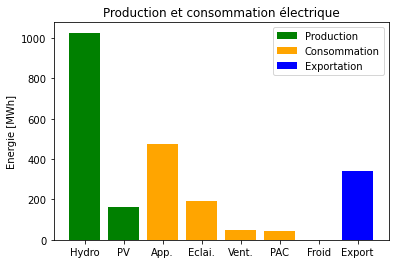

In [128]:
pac = results["consElecPac"].sum()
elec = inputs["consElec"].sum()
appareils = elec * 0.66
eclairage = elec *0.27
ventilation = elec * 0.07
froid = inputs["consFroid"].sum()/64
export = results["Bilan [kWh]"].sum()


pv = inputs["prodPV"].sum()
hydro = inputs["prodHydro"].sum()

x = np.array([hydro, pv, appareils, eclairage, ventilation, pac, froid, export])
plt.bar(x=["Hydro","PV", "App.", "Eclai.", "Vent.", "PAC", "Froid", "Export"], height=x/1000, color=["green","green", "orange","orange","orange","orange","orange","blue" ])
plt.bar(x=["Hydro","PV", "App.", "Eclai.", "Vent.", "PAC", "Froid", "Export"], height=0, color="orange")
plt.bar(x=["Hydro","PV", "App.", "Eclai.", "Vent.", "PAC", "Froid", "Export"], height=0, color="blue")
plt.title("Production et consommation électrique")
plt.ylabel("Energie [MWh]")
plt.legend(["Production", "Consommation", "Exportation"])
plt.savefig("Energie électrique.svg")

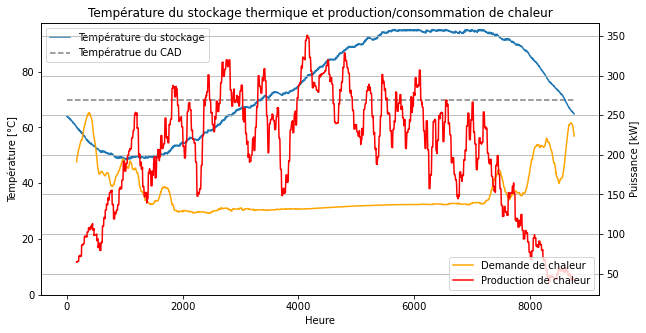

In [129]:
plt.figure(figsize=(10,5))
plt.title("Température du stockage thermique et production/consommation de chaleur")
ax = results["Température du stock [°C]"].plot()

plt.ylim(bottom=0)
plt.hlines(y=70,xmin=0, xmax=8760, colors="grey", linestyles='--', label="Température du réseau")
plt.legend(["Température du stockage", "Températrue du CAD"])
plt.ylabel("Température [°C]")

ax1 = plt.twinx(ax)
(inputs["consECS"]+inputs["consChal"]+results["pertes_horaires"]).rolling(window=24*7).mean().plot(ax=ax1, color="orange")
inputs["prodSolTh"].rolling(window=24*7).mean().plot(ax=ax1, color="red")

#(-inputs["consECS"]-inputs["consChal"]+results["pertes_horaires"]+inputs["prodSolTh"]).rolling(window=24*7).mean().plot(ax=ax1, color="red")

plt.grid(True)
plt.legend(["Demande de chaleur", "Production de chaleur"], loc="lower right")
plt.ylabel("Puissance [kW]")
#plt.bar(x=results.index, height=results.consElecPac.values)
plt.savefig("Stockage Thermique.svg")

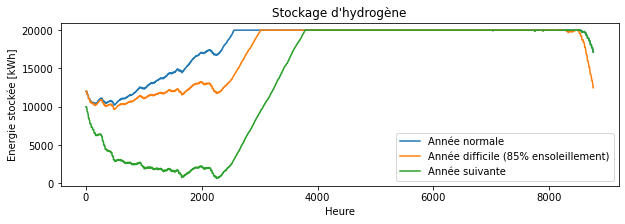

In [131]:
fig = plt.figure(figsize=(10,3))
plt.title("Stockage d'hydrogène")
plt.ylabel("Energie stockée [kWh]")
results["Stockage hydrogene [kWh]"].plot()
results2["Stockage hydrogene [kWh]"].plot()
results3["Stockage hydrogene [kWh]"].plot()
plt.legend(["Année normale", "Année difficile (85% ensoleillement)", "Année suivante"])
plt.savefig("Stockage d'hydrogène.svg")

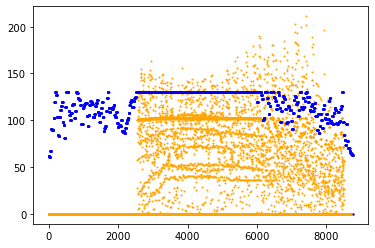

In [137]:
plt.scatter(y=inputs["prodHydro"], x=results.index, s=1, color="blue")

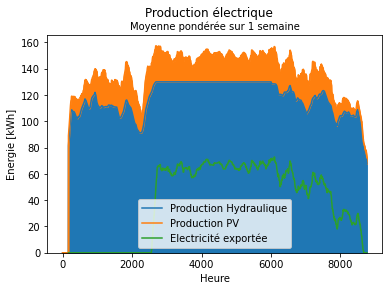

In [171]:
inputs[["prodHydro", "prodPV"]].rolling(window=24*7).mean().plot.area(stacked=True)
results["Bilan [kWh]"].rolling(window=24*7).mean().plot()
#plt.plot(y = results["Bilan [kWh]"].rolling(window=24*7).mean(), x=results.index, s=0.5, color='orange')
plt.legend(["Production Hydraulique", "Production PV", "Electricité exportée"])
plt.title("Moyenne pondérée sur 1 semaine", fontsize=10)
plt.ylabel("Energie [kWh]")
plt.suptitle("Production électrique")
plt.savefig("Production dynamique elec.svg")